## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Importing and Installing Required Libraries

In [1]:
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
!pip install wordcloud
!pip install klib

In [4]:
import klib 
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import wordcloud

# Reading Data

In [5]:
data=pd.read_csv('C:/Users/ak663/Desktop/Capstone Project/Play Store Data.csv')

# Data Exploration

In [6]:
#incorret data
data[data['Installs']=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
data.drop(10472,inplace =True)

In [8]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [10]:
data.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


# Function for the info of data

In [11]:
def printinfo():
    temp = pd.DataFrame(index=data.columns)
    temp['data_type'] = data.dtypes
    temp['null_count'] = data.isnull().sum()
    temp['unique_count'] = data.nunique()
    return temp


# Cleaning Data

In [12]:
#function for Converting Install string to integer

def installs_int(install): 
            if((type(install)==str) and (install[-1]=='+')):
                install=install[:len(install)-1]
                install=[i for i in install if i!=',']
                install="".join(install)
                return float(install)
            else:
                return float(install)
data['Installs_int']=data['Installs'].map(installs_int)

In [13]:
#function for Converting price string to integer
def price_int(price): 
            if((type(price)==str) and (price[0]=='$')):
                price=price[1:]
                return float(price)
            else:
                return float(price)
#         except:
#             if(type(review)==str):
#                 return 0
data['Price_int']=data['Price'].map(price_int)

In [14]:
#function for Converting Reviews string to integer
#reviews String to Integer
def reviews_int(review): 
            if(type(review)==str):
               
                return float(review)
            else:
                return float(review)
#         except:
#             if(type(review)==str):
#                 return 0
data['Reviews_int']=data['Reviews'].map(reviews_int)

In [15]:
#function for Converting size string to integer
#size String to Integer
def size_int(size): 
            if((type(size)==str) & (size[-1]=='M')):
                size=size[:len(size)-1]
                return float(size)
            elif((type(size)==str) & (size[-1]=='k')):
                size=size[:len(size)-1]
                return round(float(size) /1024,2)
            else:
                return 0
data['Size_int']=data['Size'].map(size_int)

# Checking Null Values

In [16]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,1474,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,1,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


# Handling Null Values

In [17]:
#replacing NUll Rating Value with the mean of Rating
data['Rating'].fillna(round(data['Rating'].mean(),1), inplace = True)

In [18]:
#droping the Remaing NA Data
data.dropna(inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
 13  Installs_int    10829 non-null  float64
 14  Price_int       10829 non-null  float64
 15  Reviews_int     10829 non-null  float64
 16  Size_int        10829 non-null  float64
dtypes: float64(5), object(12)
memor

In [20]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9648
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,5999
Size,object,0,457
Installs,object,0,20
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


# Storing clean data into new dataframe

In [21]:
cdata=data[['App', 'Category', 'Rating', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Installs_int', 'Price_int', 'Reviews_int', 'Size_int']].copy()

In [22]:
#R_M_Install is define as the Product of Rating and Install
#Which Means The no of stars user has given
#also it tells the how frequently user interact with app
cdata['R_M_Install']=cdata['Rating']*cdata['Installs_int']

GridSpec(6, 8)

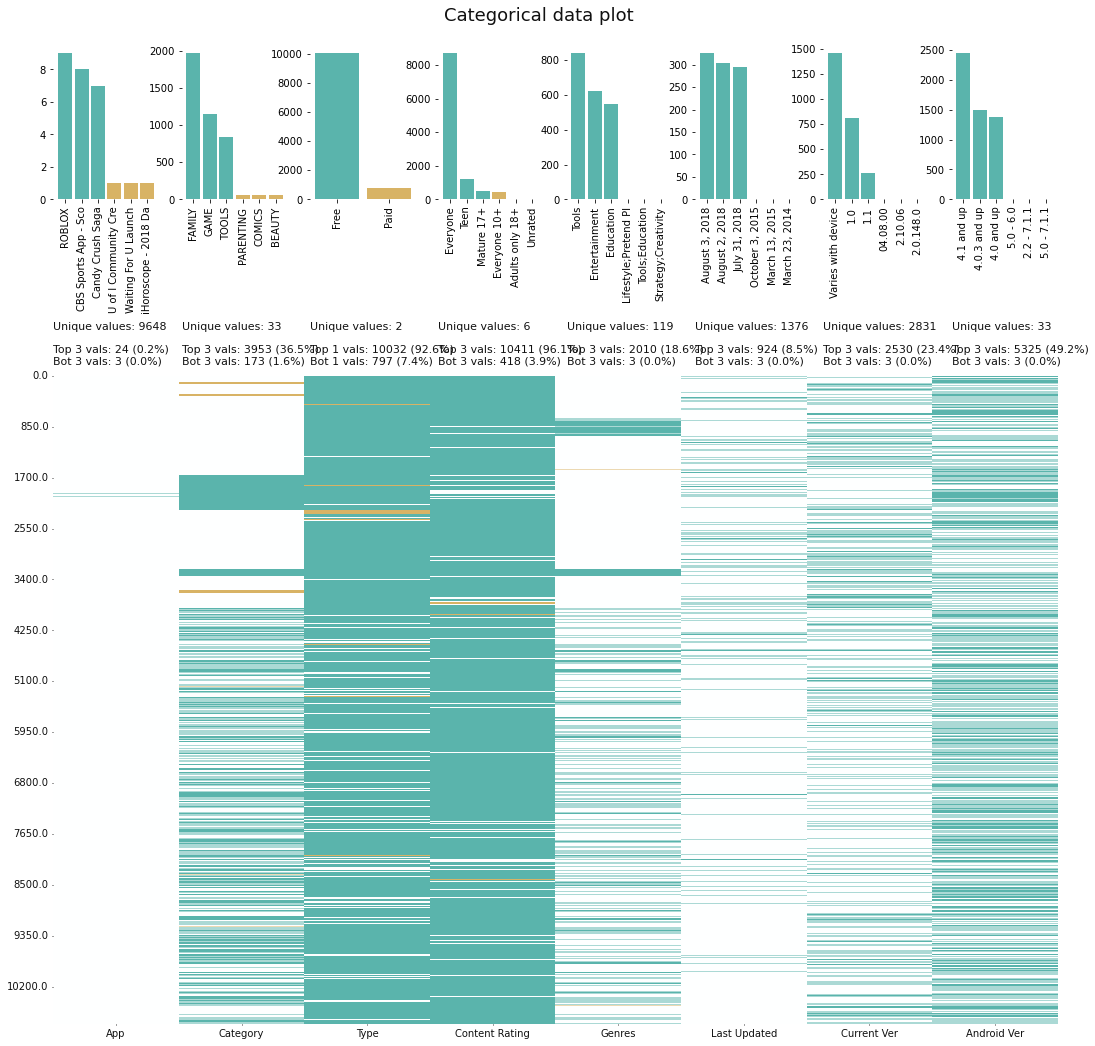

In [23]:
#categorical data plot of clean data
klib.cat_plot(cdata)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='R_M_Install', ylabel='Density'>

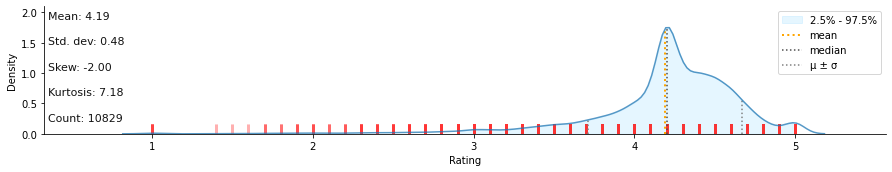

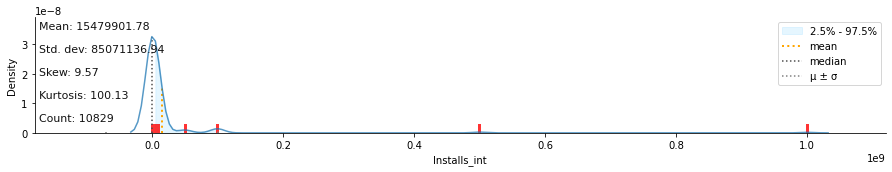

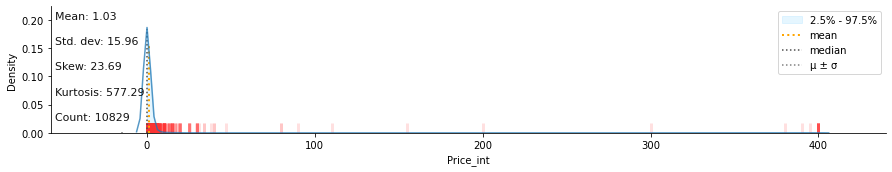

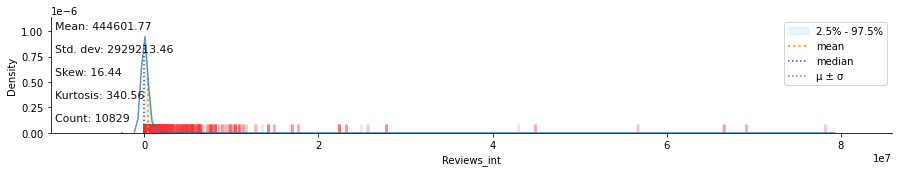

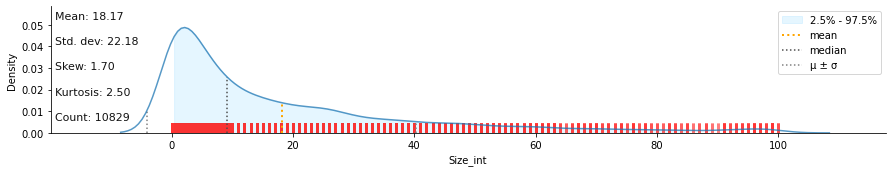

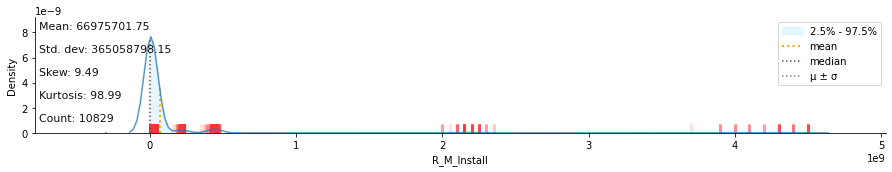

In [24]:
#DistPlot of clean data
#It show the Varation in the data
klib.dist_plot(cdata)

<AxesSubplot:>

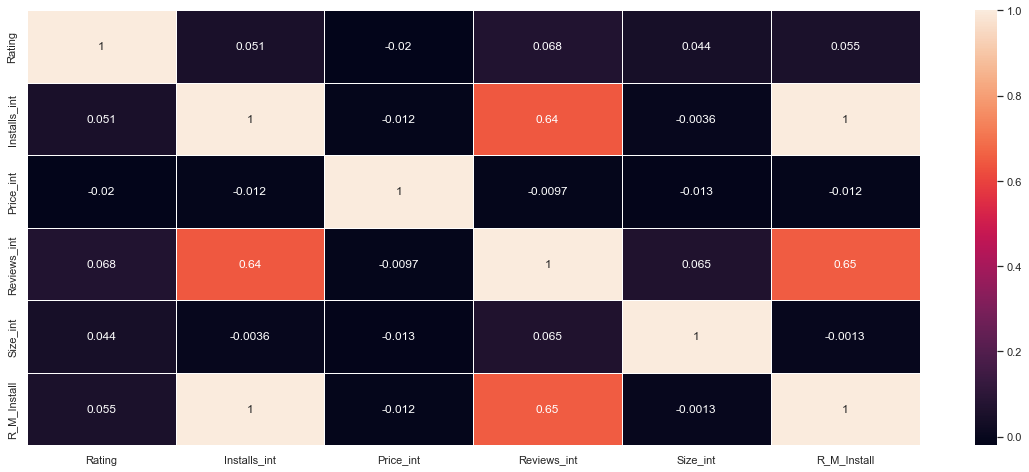

In [25]:
#correlation in the dataset
corr=cdata.corr()
sns.set(rc={'figure.figsize':(20,8)})
sns.heatmap(corr, annot=True, linewidths=0.5)


This is the correlation heatmap of the
We can see Review and install have a correlation of 0.62 which means, who ever installs the app ,leaves the review or feedback.
There is also a correlation between R_M_Install and Reviews of 0.65.



<AxesSubplot:title={'center':'Most Installed App in the dataset'}, xlabel='App', ylabel='Installs_int'>

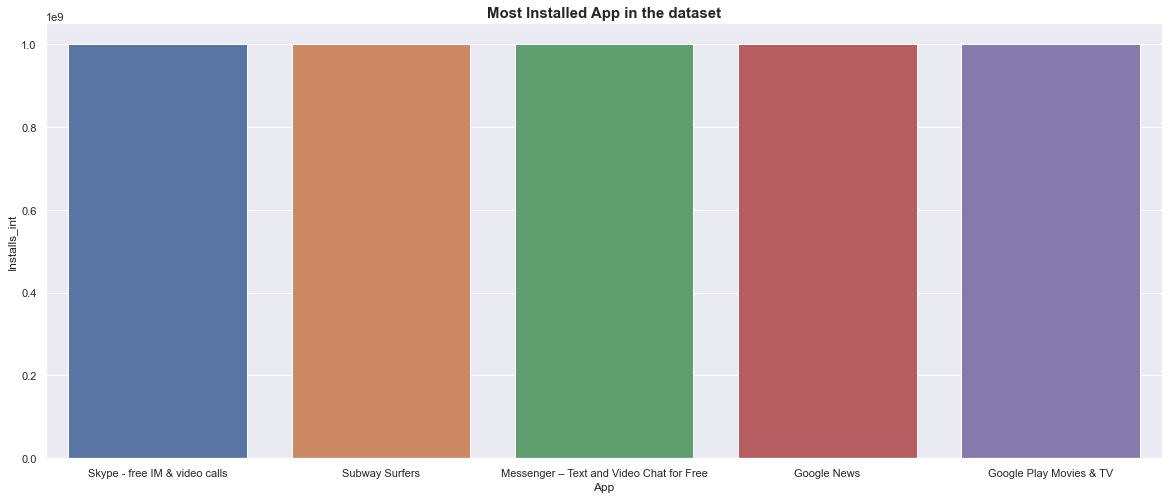

In [26]:
#most Installed App in the dataset
most_installed=cdata[['App','Installs_int']].sort_values(by='Installs_int',ascending=False).head(5)

plt.title("Most Installed App in the dataset",fontsize=15,fontweight='bold')
sns.barplot(data=most_installed,x='App',y='Installs_int')



This bar graph show the app which are installed maximum time 
Skype is the most installed app followed by Subway Surfer


In [27]:
#which Content Rating app are installed maximum time
play_store_content_rating = cdata.groupby(by='Content Rating') \
                            .agg({'Installs_int':sum,'App':'size'}) \
                            .sort_values(by = 'Installs_int', ascending = False) \
                            .reset_index()
display(play_store_content_rating)

,Content Rating,Installs_int,App
0,Everyone,1.141551e+11,8704
1,Teen,3.471635e+10,1208
2,Everyone 10+,1.323388e+10,413
3,Mature 17+,5.524491e+09,499
4,Adults only 18+,2.000000e+06,3
5,Unrated,5.050000e+04,2


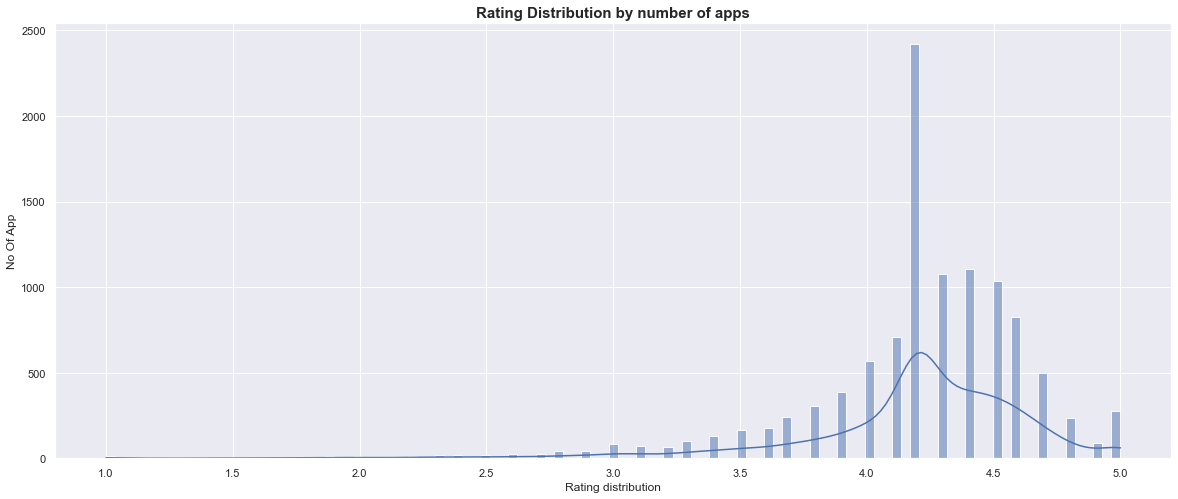

In [28]:
sns.histplot(data=cdata, x="Rating", kde=True)
plt.ylabel('No Of App')
plt.xlabel('Rating distribution')
plt.title("Rating Distribution by number of apps",fontsize=15,fontweight='bold')
plt.show()

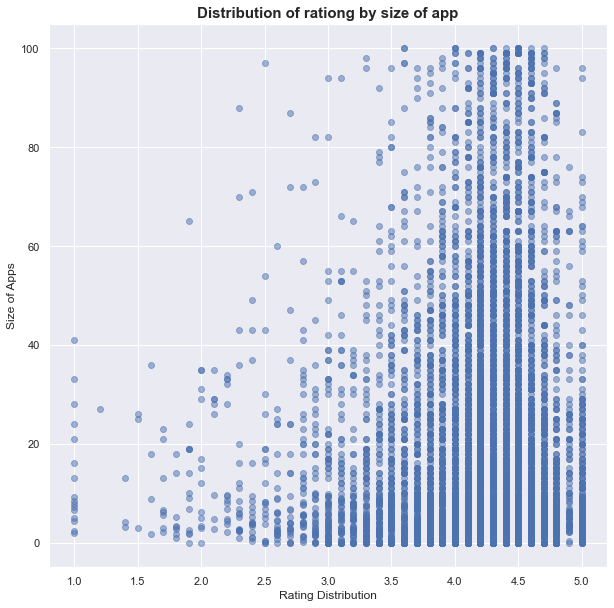

In [29]:
#distribution of rationg by size of app
plt.figure(figsize=(10,10))
plt.scatter(cdata['Rating'],cdata['Size_int'], alpha=0.5)
plt.xlabel("Rating Distribution")
plt.ylabel('Size of Apps')
plt.title("Distribution of rationg by size of app",fontsize=15,fontweight='bold')
plt.show()

In this bar graph and the scatter plot we can clearly see most of the apps rating is distributed 4-4.5 rating.
Max no of have 4.1 Rating(too High)

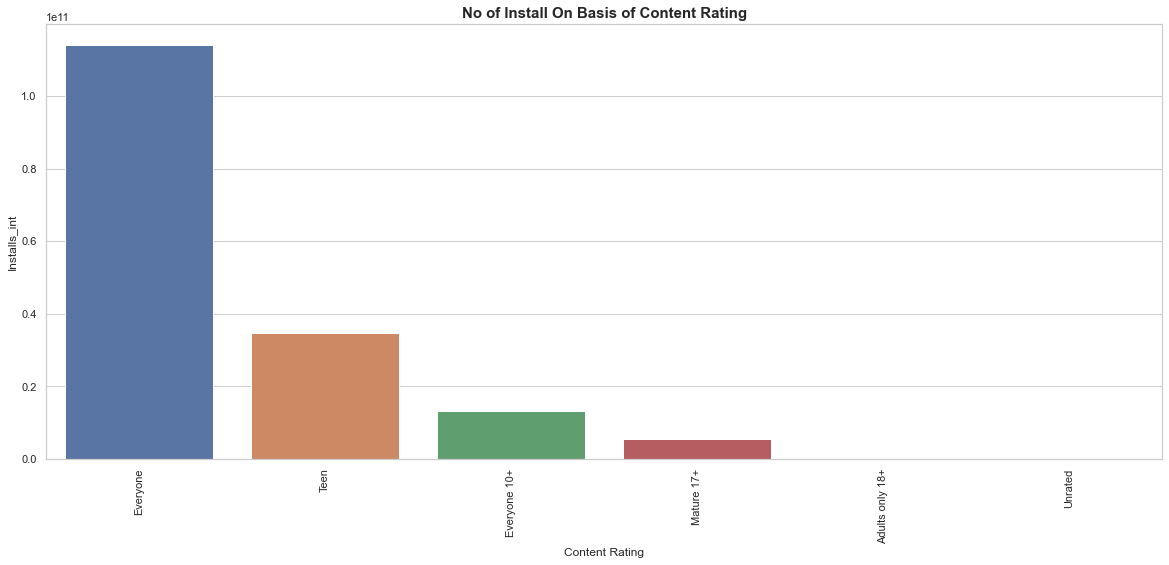

In [30]:
#which Content Rating app are installed maximum time
with sns.axes_style("whitegrid"):
  g = sns.barplot(x = 'Content Rating', y = 'Installs_int', data = play_store_content_rating, ci = None)
  g.tick_params(axis='x', rotation=90)
plt.title("No of Install On Basis of Content Rating",fontsize=15,fontweight='bold')
plt.show()

This bar Graph show the No of installs on the basis of Content Rating.
From Graph we can se ‘Everyone’ content rating apps are the most installed apps 

<AxesSubplot:title={'center':'No of Install On Base of Category'}, xlabel='Category', ylabel='No of Installs'>

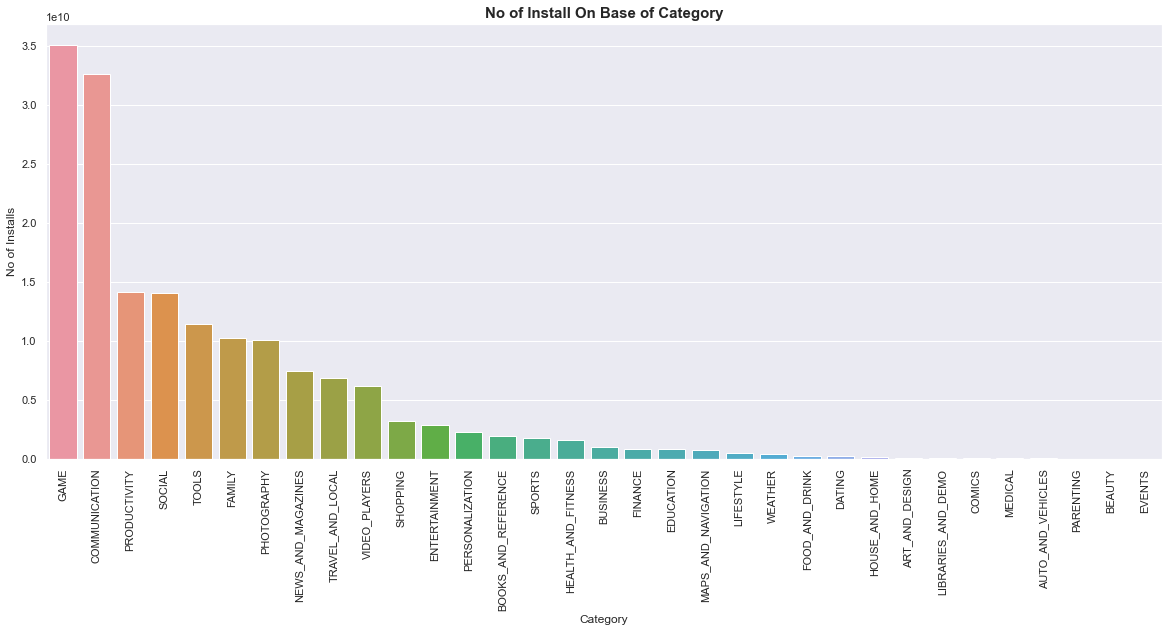

In [31]:

no_of_inst=cdata.groupby('Category')['Installs_int'].sum().sort_values(ascending=False)
plt.title("No of Install On Base of Category",fontsize=15,fontweight='bold')
plt.ylabel('No of Installs')
plt.xticks(rotation=90)
sns.barplot(data=cdata, x=no_of_inst.index,y=no_of_inst.values)

In this bar graph, the height of bar define the number of installation and in the x-axis all categories are defined
We can se Game categories app are the most installed apps, followed by the Communication category app


<AxesSubplot:title={'center':'No of App available On Base of Category'}, xlabel='Category', ylabel='No of Apps'>

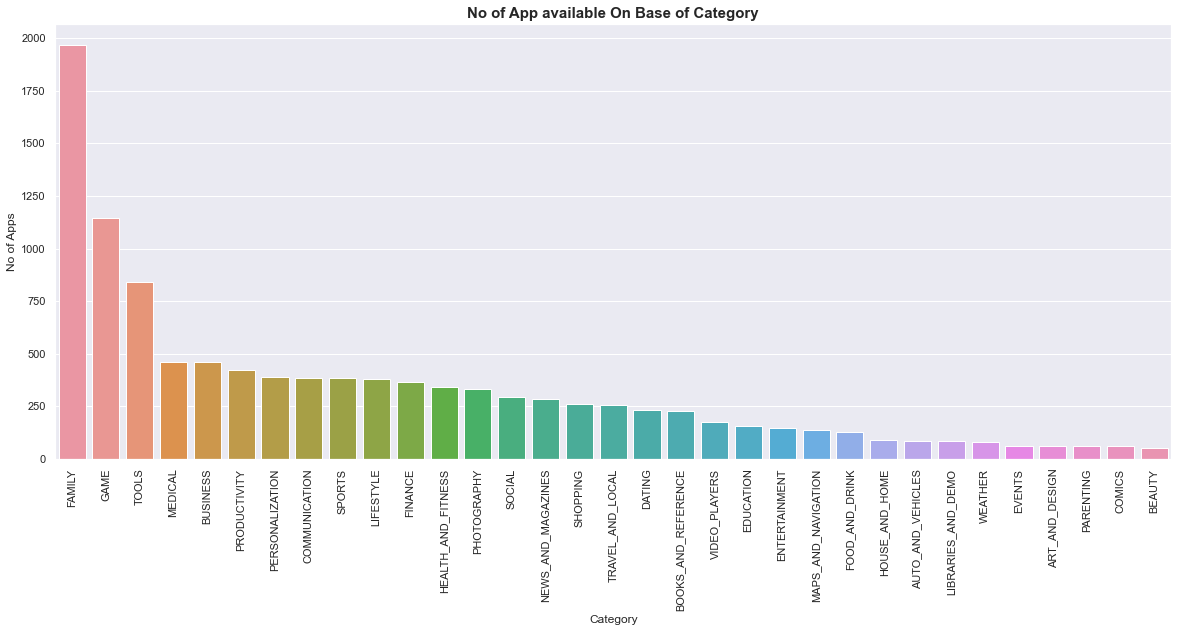

In [32]:
cri=cdata.groupby('Category')['App'].count().sort_values(ascending=False)
plt.title("No of App available On Base of Category",fontsize=15,fontweight='bold')
plt.ylabel('No of Apps')
plt.xticks(rotation=90)
sns.barplot(data=cdata, x=cri.index,y=cri.values)

Most number of app in play store belong to the family category app, which have around 1900 apps
Followed by the Game category ,which have around 1175 app in play store


<AxesSubplot:title={'center':'No of Install With Increasing App Size'}, xlabel='Size_int', ylabel='No of Apps'>

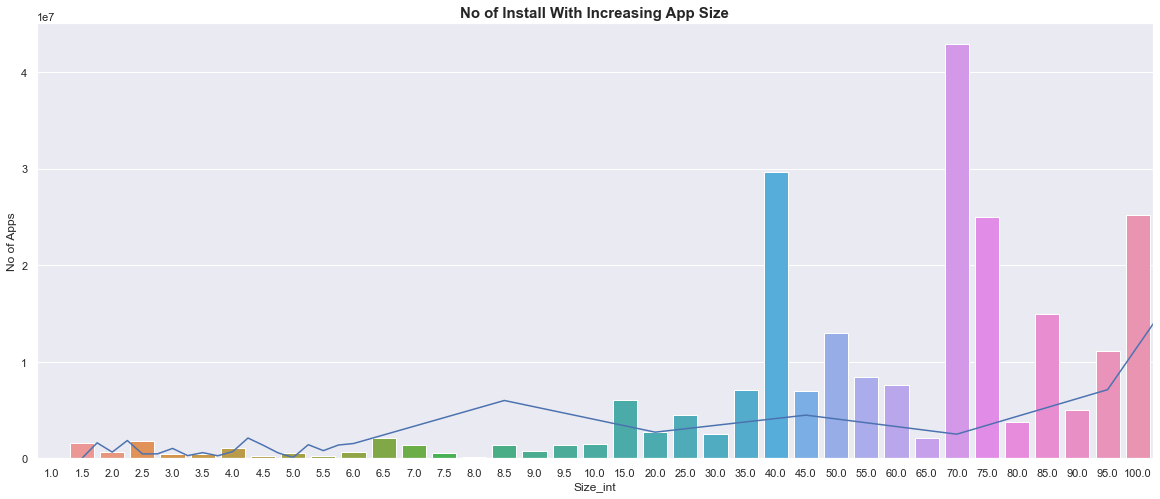

In [33]:
a=cdata.groupby('Size_int')['Installs_int'].mean()
#a=pd.DataFrame(a)
a=a[1::5]
plt.ylabel('No of Apps')
plt.title("No of Install With Increasing App Size",fontsize=15,fontweight='bold')
a.plot(kind='line')
sns.barplot(x =a.index, y = a.values,)

This bar graph show the relation between the size and no of installation.

From Graph it can be seen 40MB and 70-75 MB apps are the  most installed app 


Text(0, 0.5, 'Size of Apps')

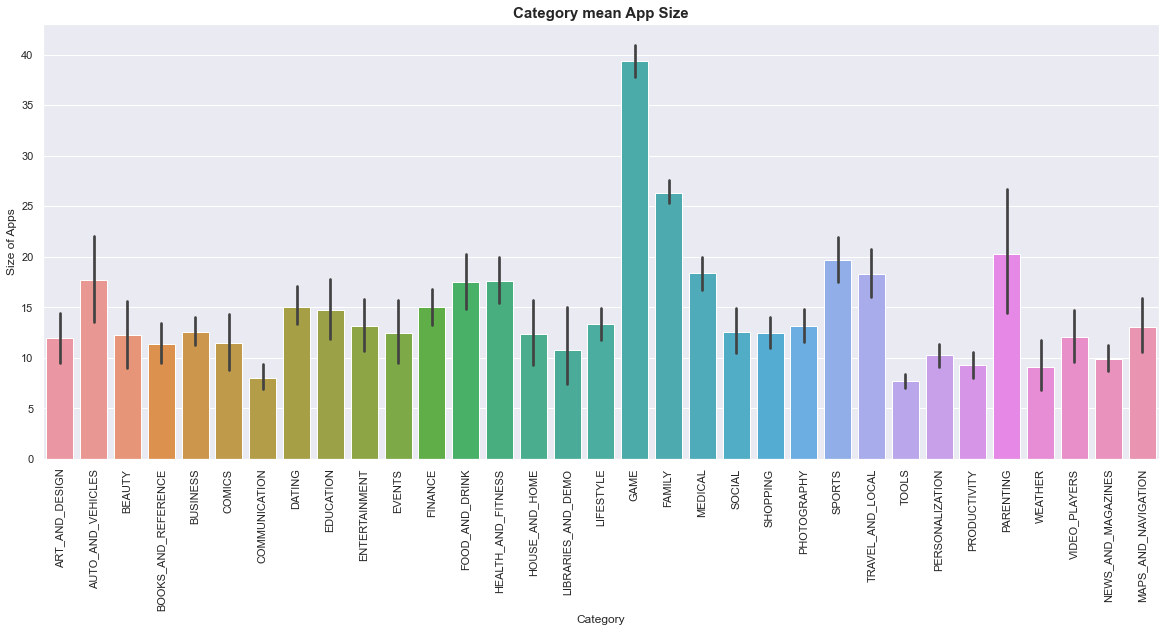

In [34]:
#Each Category mean App Size
plt.xticks(rotation=90)
plt.title("Category mean App Size",fontsize=15,fontweight='bold')
sns.barplot(data=cdata, x=cdata.Category,y=cdata.Size_int)
plt.ylabel('Size of Apps')

 In this bar graph, the height of bar define the average size of that category
Game apps have the Highest average app size

Followed by the Family category app

Average size of app of all the category is between  10-20MB


Text(0.5, 1.0, 'Interaction with User by category')

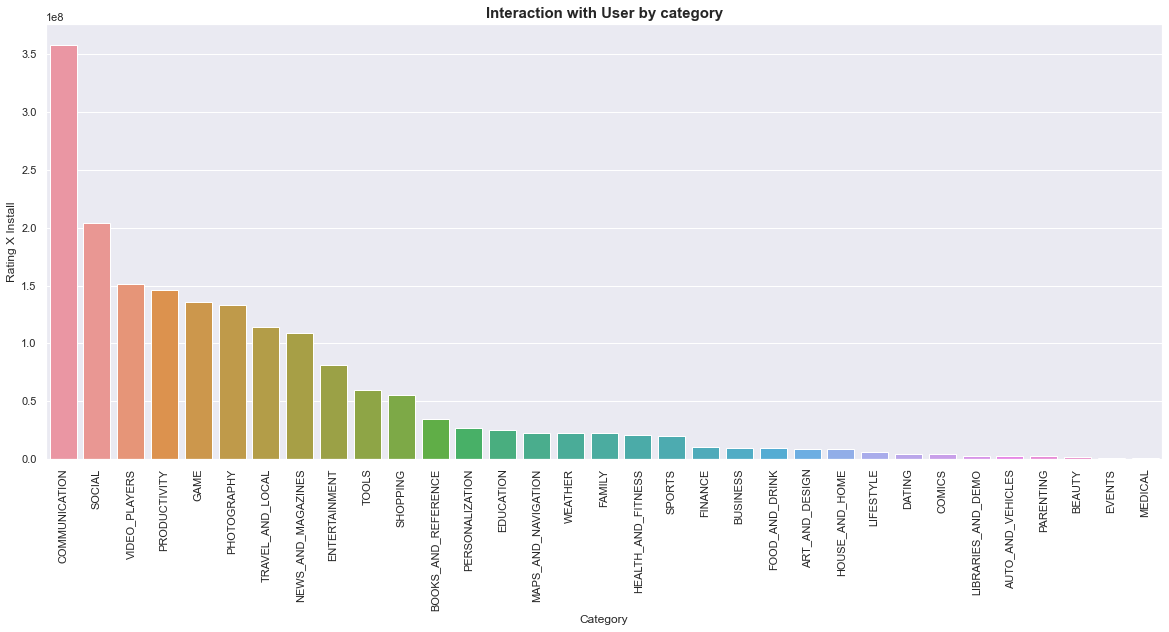

In [35]:
# Most Frequently used app or app having maximum interaction with user
freq_used=cdata.groupby('Category')['R_M_Install'].mean().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(rotation=90)
sns.barplot(x = freq_used.index, y = freq_used.values)
plt.ylabel('Rating X Install')
plt.title("Interaction with User by category",fontsize=15,fontweight='bold')


R_M_Install is define as the Product of Rating and Install
Which Means The no of stars user has given, also it tells the how frequently user interact with app
We can see Communication Category have the most interaction , followed by the Social category app


<AxesSubplot:title={'center':'Top 10 Category Having max no of app'}, ylabel='Category'>

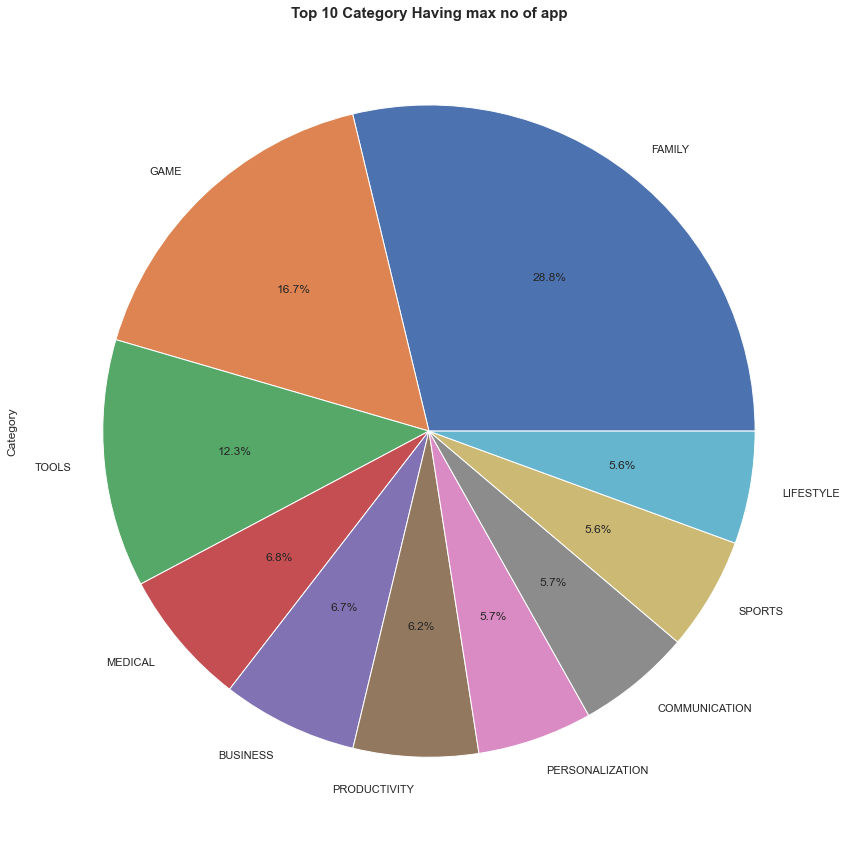

In [36]:
#Top 10 Category Having max app Using Pie Chart
cat_pie = cdata['Category'].value_counts().head(10).plot.pie(autopct='%3.1f%%', figsize=(15,15))
plt.title("Top 10 Category Having max no of app",fontsize=15,fontweight='bold')
cat_pie

Most number of app in play store belong to the family category app, which have around 1900 apps
Followed by the Game category ,which have around 1175 app in play store
Top 10 Category

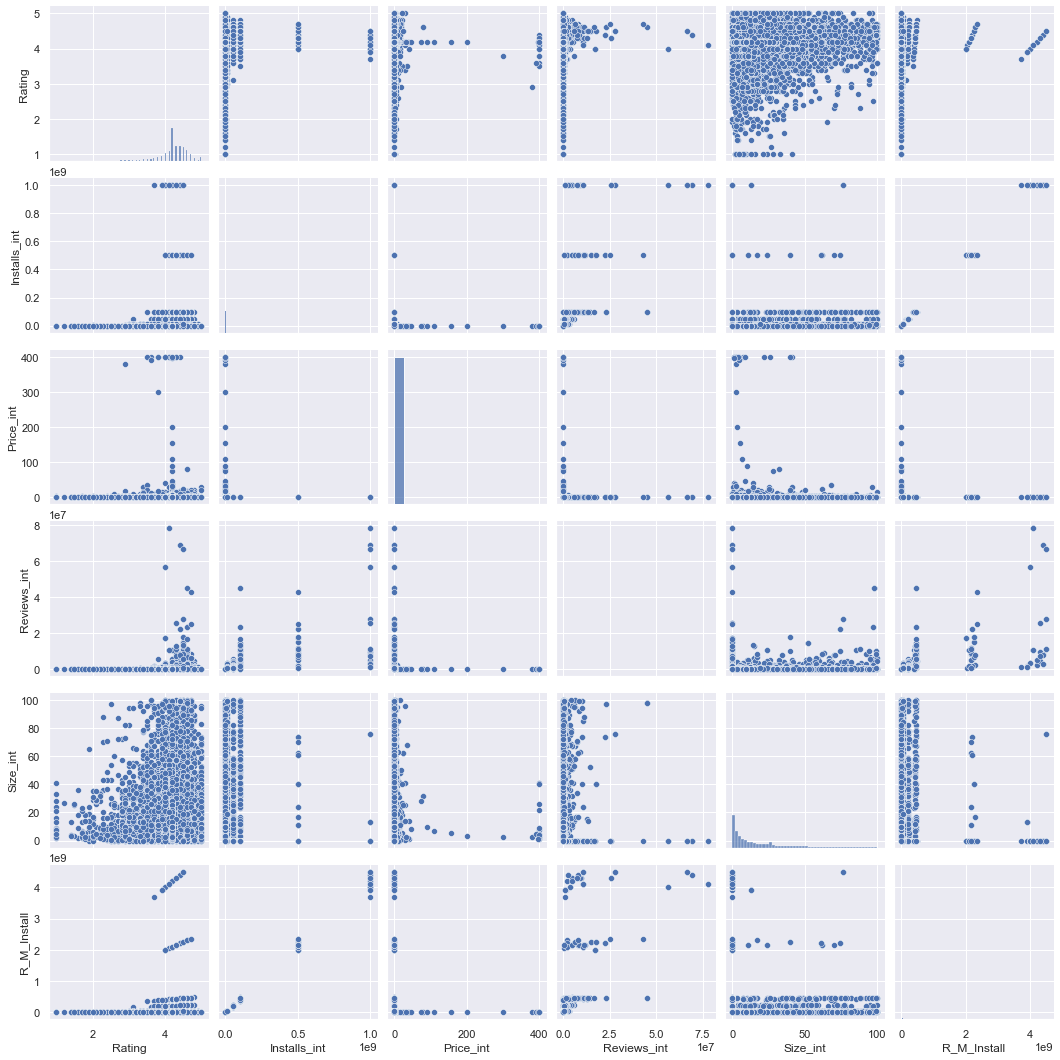

In [37]:
#Pair plot of the Clean Data
#it show the Distribution of ever variable with respect to other
sns.pairplot(data=cdata)

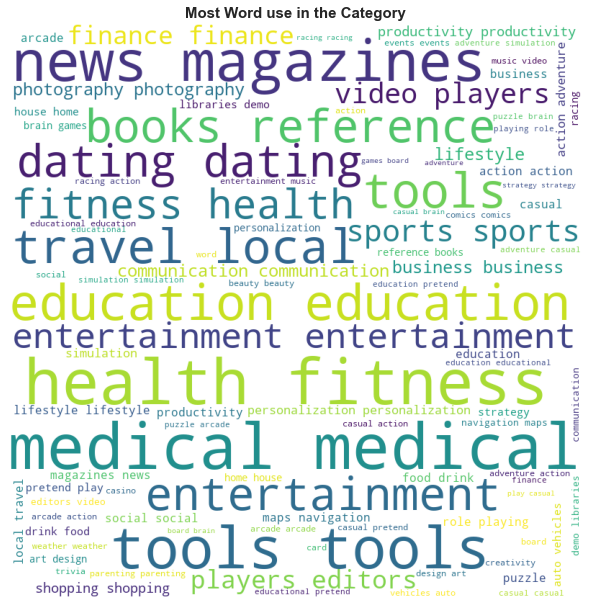

In [38]:
#word Cloud of the Category 
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in cdata['Genres']:

     # typecaste each val to string
     val = str(val)

     # split the value
     tokens = val.split()

     # Converts each token into lowercase
     for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
     
     comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

# plot the WordCloud image                         
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Most Word use in the Category",fontsize=15,fontweight='bold')

plt.show()


 Word Cloud for the Most repeated word in the Category

# Analysis of paid apps

Text(0, 0.5, 'Average Price')

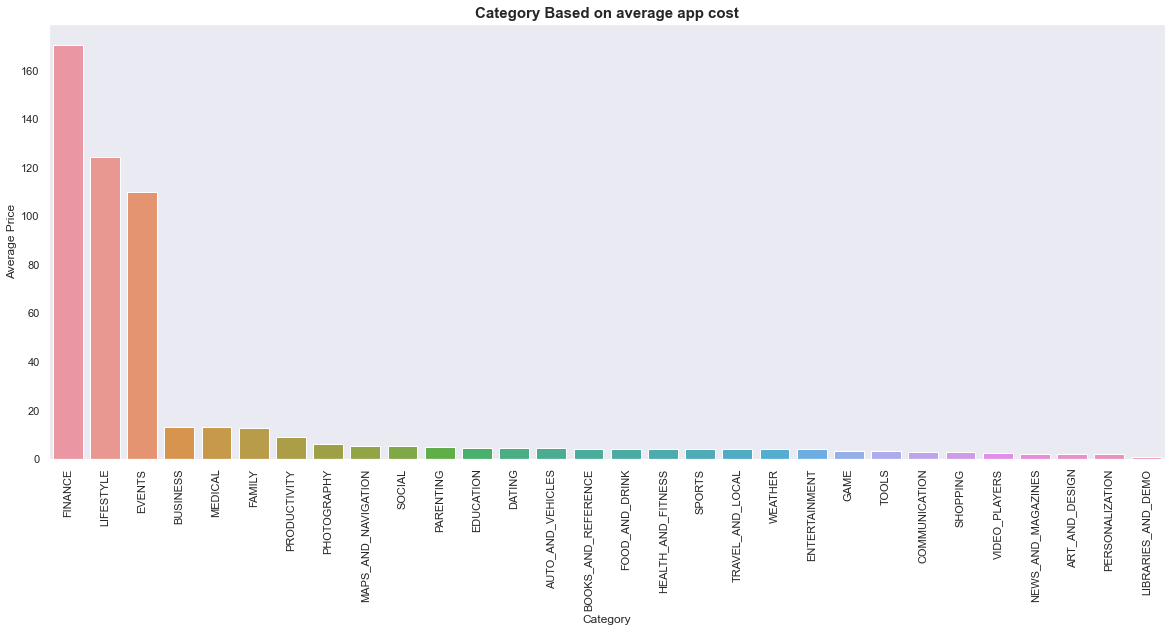

In [39]:
#Which category have costly app
paid_app=cdata[(cdata['Type']=='Paid')]
c_p=paid_app.groupby('Category')['Price_int'].mean().sort_values(ascending=False)
plt.grid()
plt.xticks(rotation=90)
sns.barplot(c_p.index,c_p.values)
plt.title("Category Based on average app cost",fontsize=15,fontweight='bold')

plt.ylabel('Average Price')

This graph show the average price in the paid app category.
We can see the Finance category app are the most expensive app , followed by the Lifestyle

<AxesSubplot:title={'center':'Tor 5 Expensive Apps'}, xlabel='App', ylabel='Price_int'>

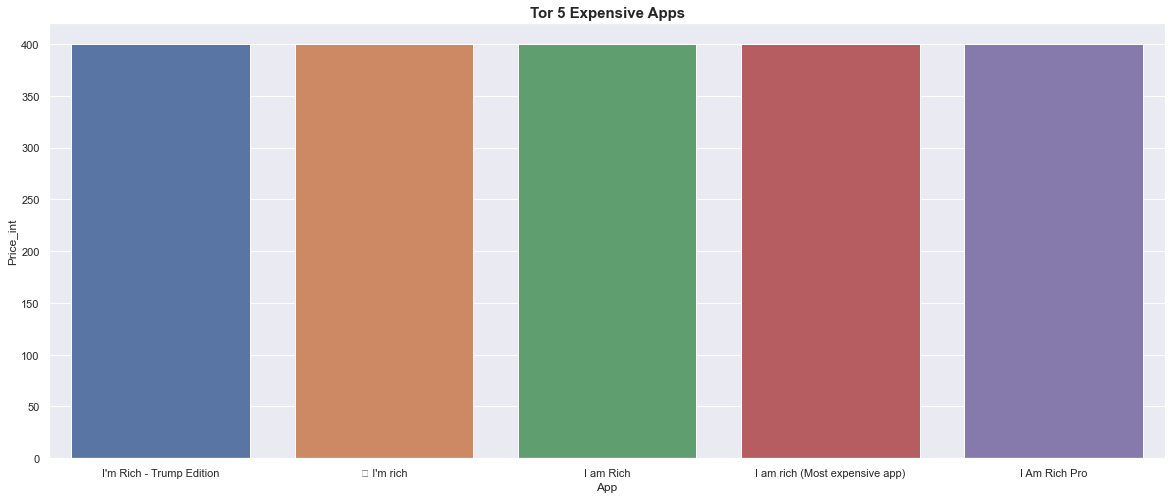

In [40]:
#Top 5 Expensive Apps
top_expen=data[['App','Price_int']].sort_values(by='Price_int',ascending=False).head()
plt.title("Tor 5 Expensive Apps",fontsize=15,fontweight='bold')
sns.barplot(top_expen['App'],top_expen['Price_int'])

This Bar Graph show the highest paid apps among all the apps available in play store

Text(0, 0.5, 'No of Apps')

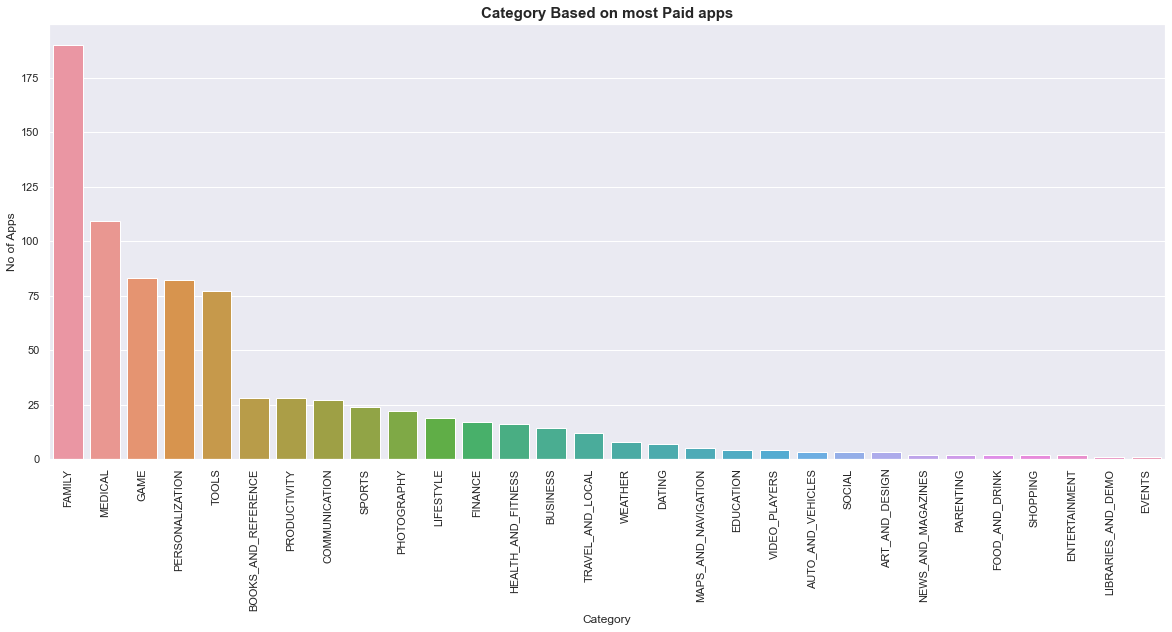

In [41]:
#Which category have most paid app
price_rel=paid_app.groupby(['Category'])['App'].count().sort_values(ascending=False)
sns.barplot(price_rel.index,price_rel.values)
plt.xticks(rotation=90)
plt.title("Category Based on most Paid apps",fontsize=15,fontweight='bold')
plt.ylabel('No of Apps')

This Bar graph Show the No. of paid apps in each category
Family category have the highest no. of paid app, followed by Medical and Game

In [42]:
paid_app[paid_app['Category']=='FINANCE'].shape

(17, 14)

In [43]:
paid_app[paid_app['Category']=='FAMILY'].shape

(190, 14)

In [44]:
free_app=cdata[(cdata['Type']=='Free')]


Text(0, 0.5, 'No of Apps')

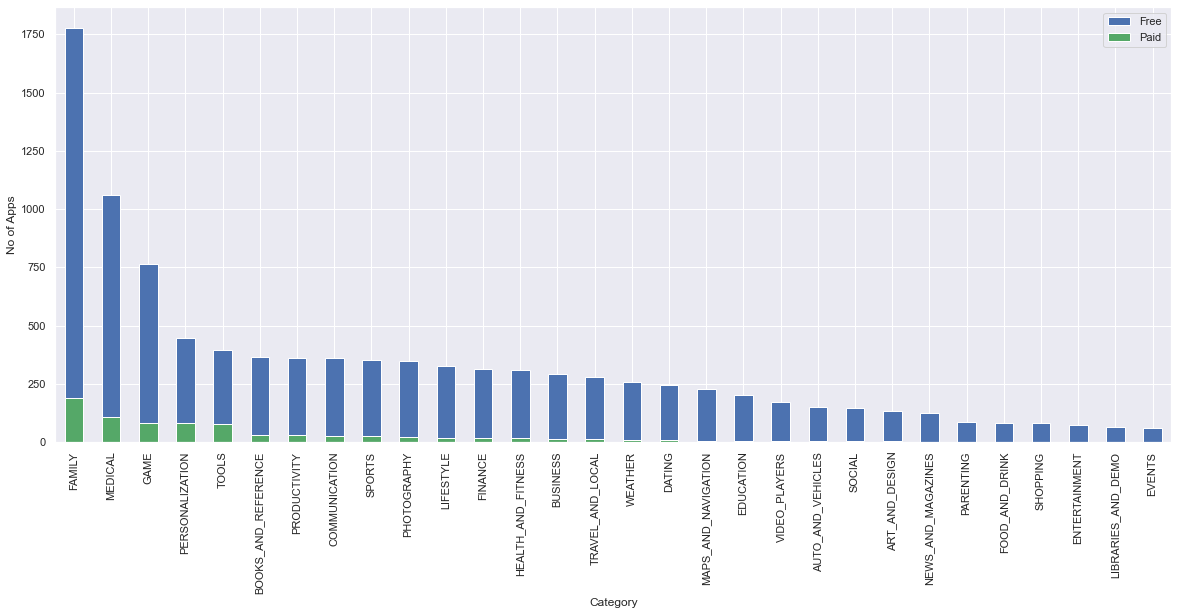

In [45]:
free_rel=free_app.groupby('Category')['Price_int'].count().sort_values(ascending=False)
free_rel.plot(kind='bar')
price_rel.plot(kind='bar',color='g')
legend_drawn_flag = True
plt.legend(["Free", "Paid"], loc=0, frameon=legend_drawn_flag)
plt.ylabel('No of Apps')

This Stack Bar graph Show the Free and Paid app in each category
As we can see, in every category around 14% app are paid

Text(0.5, 1.0, 'Paid and Free App')

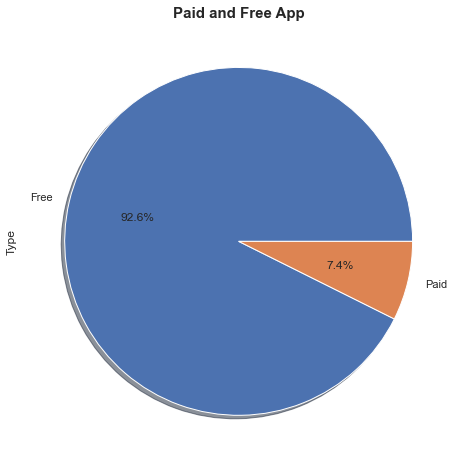

In [46]:
#Pie chart of Paid and Free App
cdata['Type'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("Paid and Free App",fontsize=15,fontweight='bold')


Pie chart show the all apps on the basis of free and paid type
Free App: 92.6%
Paid App:7.4%


# Sentiment Analysis (2nd DataSet) 

In [47]:
review_data=pd.read_csv("C:/Users/ak663/Desktop/Capstone Project/User Reviews.csv")

In [48]:
review_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [49]:
review_data.dropna(inplace=True)

#  Combining Data

In [50]:
comb_dataset=pd.merge(cdata,review_data,how='inner',on='App')
comb_dataset.head()


,App,Category,Rating,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int,Price_int,Reviews_int,Size_int,R_M_Install,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,0.0,967.0,14.0,1950000.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,0.0,967.0,14.0,1950000.0,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,0.0,967.0,14.0,1950000.0,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,0.0,967.0,14.0,1950000.0,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,0.0,967.0,14.0,1950000.0,I hate,Negative,-0.800,0.900000


GridSpec(6, 10)

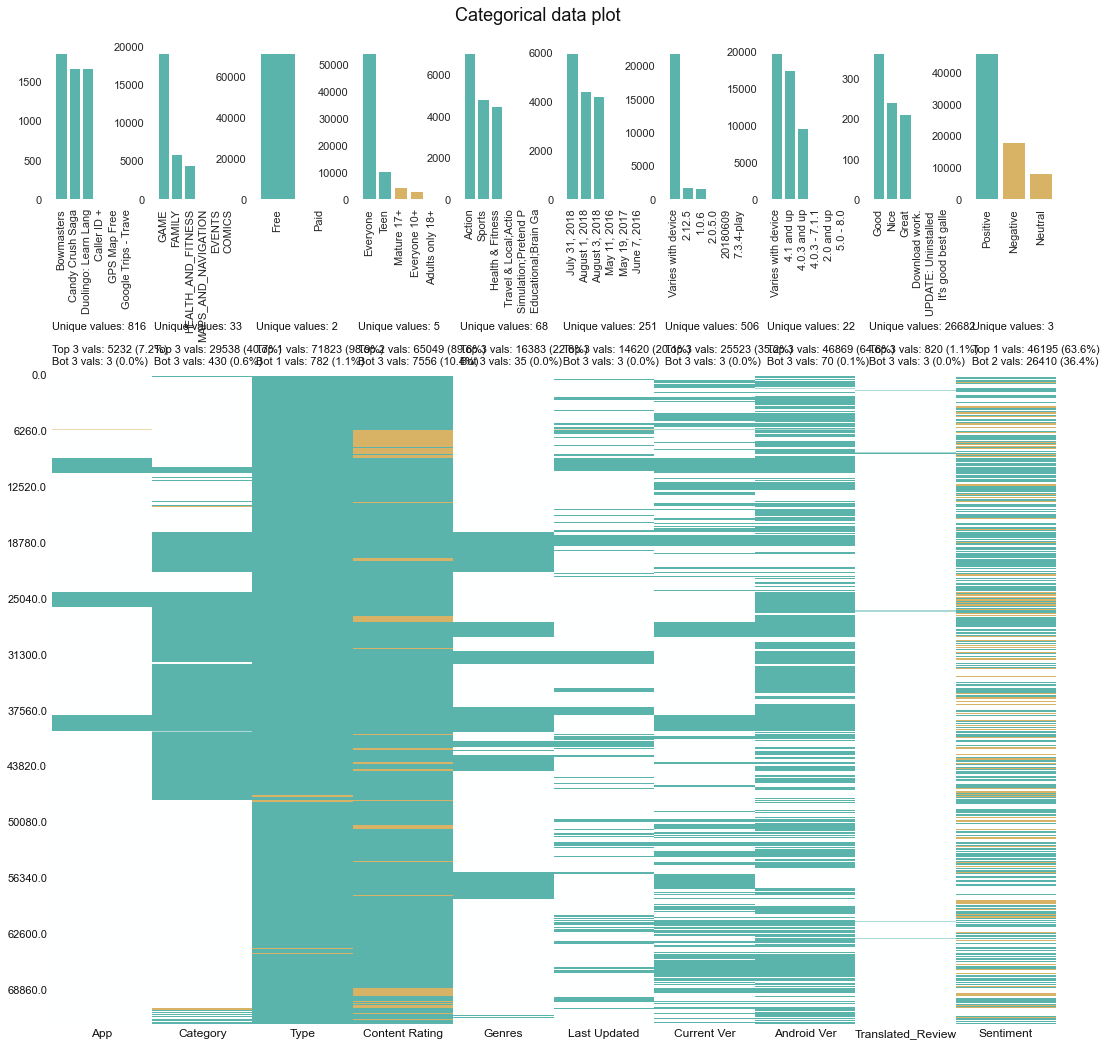

In [51]:
#DistPlot of Reviews data
#It show the Varation in the data
klib.cat_plot(comb_dataset)

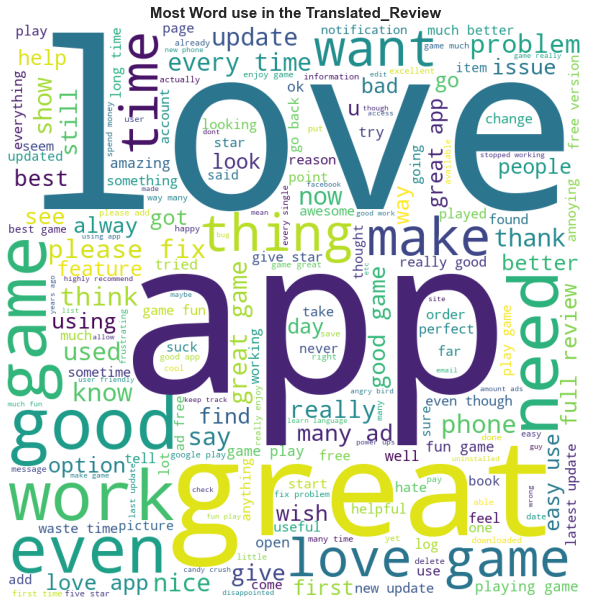

In [52]:
#word Cloud of the Category 
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in comb_dataset['Translated_Review']:

     # typecaste each val to string
     val = str(val)

     # split the value
     tokens = val.split()

     # Converts each token into lowercase
     for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
     
     comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

# plot the WordCloud image                         
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Most Word use in the Translated_Review",fontsize=15,fontweight='bold')

plt.show()


Word cloud for the Most repeated word in the Reviews Data

<AxesSubplot:title={'center':'Correlation In dataset'}>

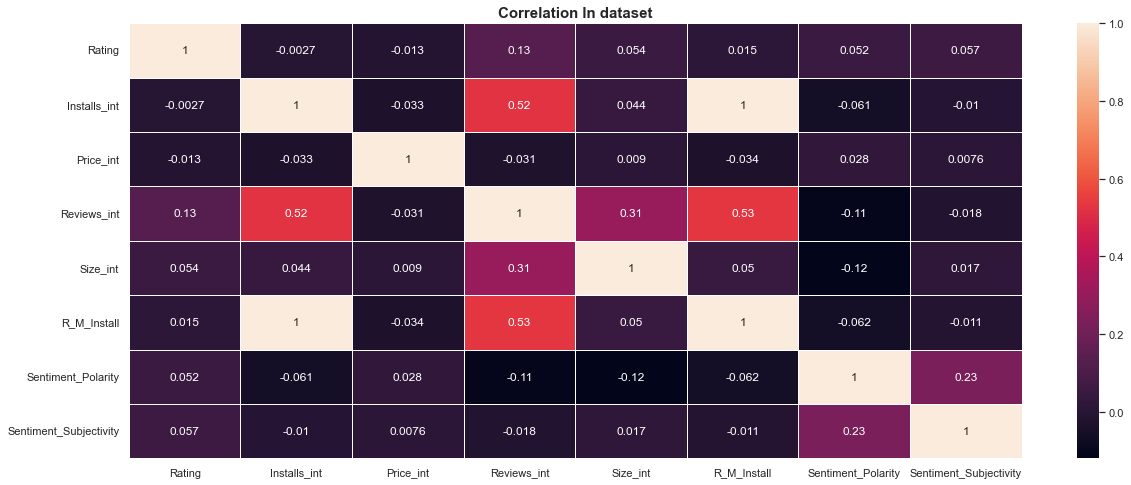

In [53]:
#correlation in the dataset
plt.title("Correlation In dataset",fontsize=15,fontweight='bold')
sns.heatmap(comb_dataset.corr(), annot=True, linewidths=0.5)

<AxesSubplot:title={'center':'Type of Reviews by their count'}, xlabel='Sentiment', ylabel='count'>

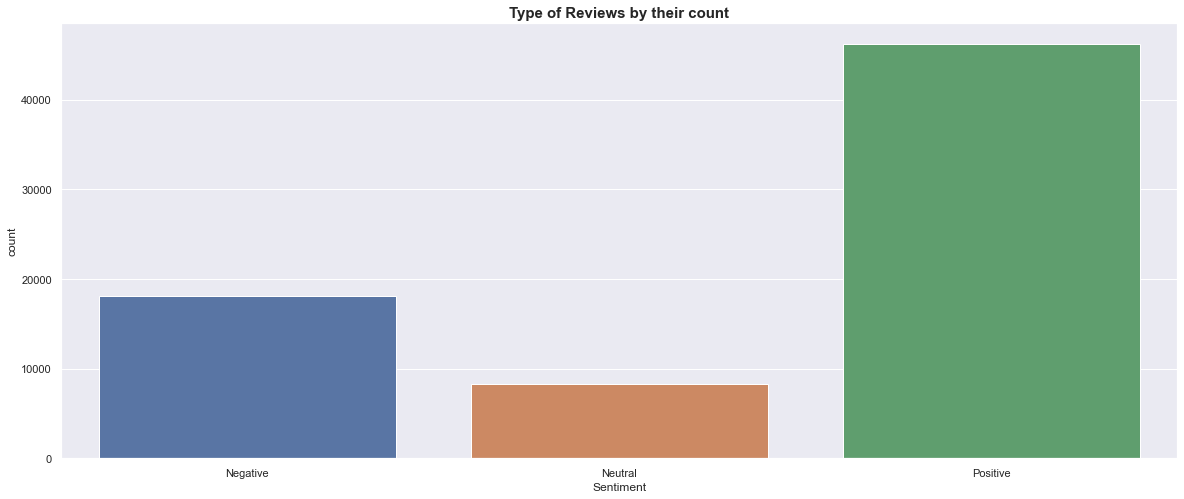

In [54]:
a=comb_dataset['Sentiment']
plt.title("Type of Reviews by their count",fontsize=15,fontweight='bold')

sns.countplot(a)

This bar graph show the Sentiment of review and their Count
From Graph we can see ,there are maximum number of positive reviews



<AxesSubplot:title={'center':'Top 5 Reviewed Apps'}, xlabel='App'>

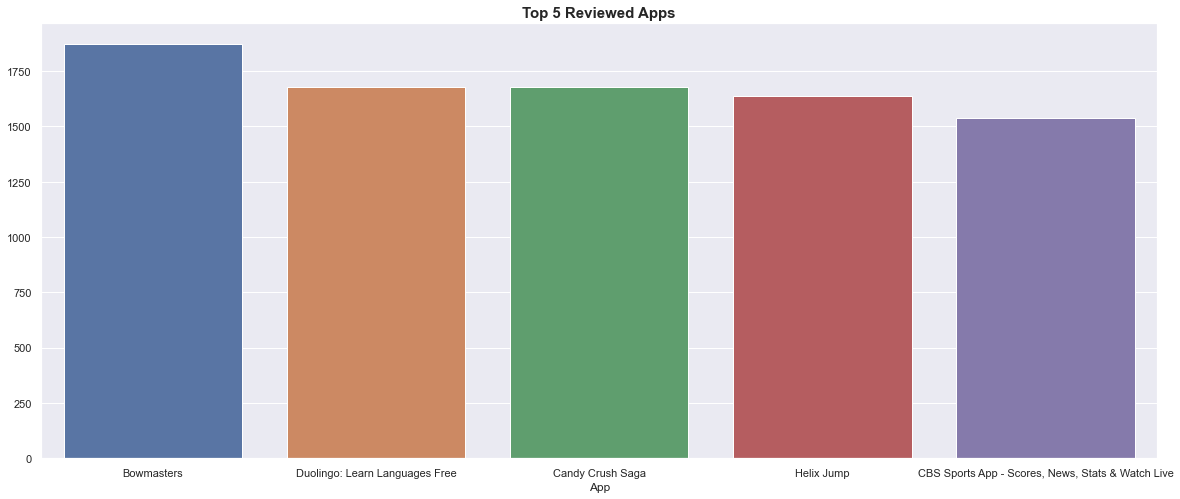

In [55]:
#Top 5 Reviewed Apps
most_review=comb_dataset.groupby('App')['Translated_Review'].count().sort_values(ascending=False).head()
plt.title("Top 5 Reviewed Apps",fontsize=15,fontweight='bold')
sns.barplot(most_review.index,most_review.values)

From the Second dataset 
This graph show the top 5 apps having most reviews


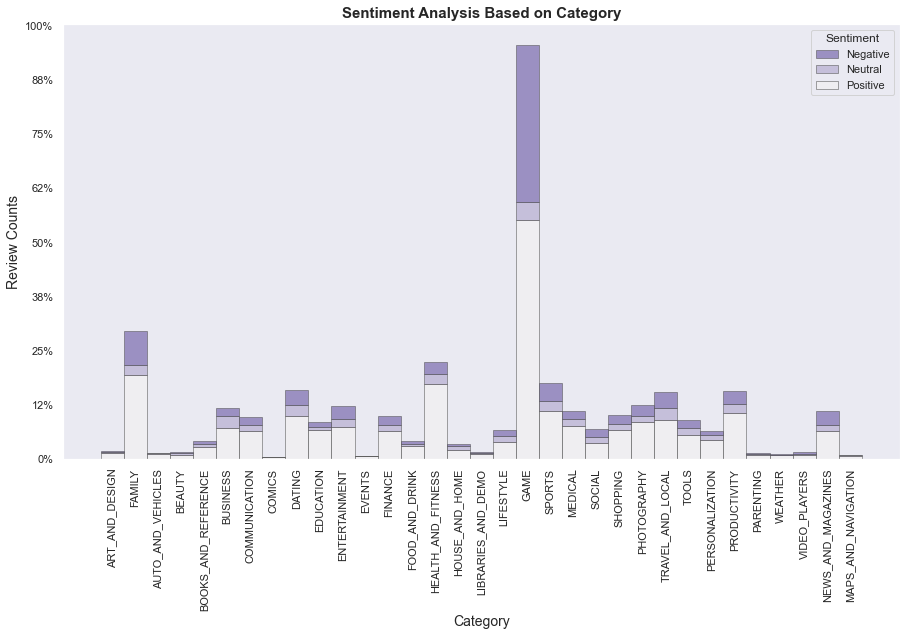

In [56]:
from matplotlib.ticker import PercentFormatter

f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)


sns.histplot(
    data=comb_dataset,
    x="Category", hue="Sentiment",
    bins=34,
    ax=ax, 
    stat="count",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    legend=True
    )


ax.set_title("Sentiment Analysis Based on Category",fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical')
ax.set_xlabel("Category",fontsize=14)
ax.set_ylabel("Review Counts",fontsize=14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(20000))
sns.set(style="ticks")
plt.grid()
plt.show()


This bar graph show Reviews stack in each category
From Graph we can see ,Game category apps have maximum number of reviews, and half of them are negative and positive and small number of neutral Review 
Then it is followed by Family category  

